# PCA （Principal Component Analysis）

- **通过线性变换（中心旋转），寻找最佳的线性组合，削弱特征线性相关导致的过拟合**


- **用途：数据降维，数据压缩；聚类分析，数据可视化**

>机器学习中常需要**数据降维**，防止过拟合; 但偶尔也有**数据升维**，防止欠拟合的情况，例如

> - polynomial regression （相对于linear regression）
> - svm kernel 分离低维空间中不可分离的点

假设有$n$个sample $\vec{x_i},\;(i=1,2,\dots,n)$ (n次测量)，每个sample有m个分量，$\vec{x_i}=［x_{i1},x_{i2},\dots,x_{im}］$（每次测量有m个值），将这 $n$ 个矢量堆在一起构成一个 $n\times m$ 维矩阵，

$$\bf{X}=\begin{bmatrix}\vec{x_1}\\\vec{x_2}\\\vdots\\\vec{x_n}\end{bmatrix}=
\begin{bmatrix}x_{11}&x_{12}&\dots&x_{1m}\\
x_{21}&x_{22}&\dots&x_{2m}\\
\vdots&\vdots&\ddots&\vdots\\
x_{n1}&x_{n2}&\dots&x_{nm}\end{bmatrix}$$

要解决的问题是：<strong>找到一个线性变换 $\bf{XW=Y}$ 使其“最好的”表征 $\mathbf{X}$ 中的"有效信息"</strong>

其中$W$ 是一个$m\times l$维矩阵，

$$\bf{W} = \begin{bmatrix}w_{11}&w_{12}&\dots&w_{1l}\\
w_{21}&w_{22}&\dots&w_{2l}\\
\vdots&\vdots&\ddots&\vdots\\
w_{m1}&w_{m2}&\dots&w_{ml}
\end{bmatrix}\equiv \begin{bmatrix}\vec{w}_1&\vec{w}_2&\dots&\vec{w}_l\end{bmatrix}$$

即 $$\bf{XW}=\begin{bmatrix}x_{11}&x_{12}&\dots&x_{1m}\\
x_{21}&x_{22}&\dots&x_{2m}\\
\vdots&\vdots&\ddots&\vdots\\
x_{n1}&x_{n2}&\dots&x_{nm}\end{bmatrix}
\begin{bmatrix}w_{11}&w_{12}&\dots&w_{1l}\\
w_{21}&w_{22}&\dots&w_{2l}\\
\vdots&\vdots&\ddots&\vdots\\
w_{m1}&w_{m2}&\dots&w_{ml}
\end{bmatrix}
=\begin{bmatrix}\vec{x_1}\\\vec{x_2}\\\vdots\\\vec{x_n}\end{bmatrix}
\begin{bmatrix}\vec{w_1}&\vec{w_2}&\dots&\vec{w_l}\end{bmatrix}\equiv
\begin{bmatrix}\vec{y_1}\\\vec{y_2}\\\vdots\\\vec{y_n}\end{bmatrix}\equiv\bf{Y}$$,

显然，根据定义有：
$$\vec{y}_i=[\vec{x}_i\cdot\vec{w}_1,\vec{x}_i\cdot\vec{w}_2,\dots,\vec{x}_i\cdot\vec{w}_l]$$
根据这一表达式，我们可以将，$\{\vec{w}_1,\vec{w}_2,\dots,\vec{w}_l\}$ 看作是一组 base vectors，$\vec{y}_i$ 的各分量是 $\vec{x}_i$ 在这组“基” 上的各投影值。 或者说: ***<span style="color:red"> "$\vec{y}_i$ 是 $\vec{x}_i$ 相对于 这组"基"的表示" </span> ***

我们将$\bf{Y}$ 改写成列向量的形式，即

$$\bf{Y}\equiv\begin{bmatrix}\vec{y_1}\\\vec{y_2}\\\vdots\\\vec{y_n}\end{bmatrix}\equiv
\begin{bmatrix}y_{11}&y_{12}&\dots&y_{1l}\\
y_{21}&y_{22}&\dots&y_{2l}\\
\vdots&\vdots&\ddots&\vdots\\
y_{n1}&y_{n2}&\dots&y_{nl}\end{bmatrix}\equiv
\begin{bmatrix} Y_1&Y_2&\dots&Y_l\end{bmatrix}$$, 即将$\bf{Y}$的第i列看作是随机向量 $Y_i\;(i=1,2,\dots l)$的n次采样结果。 

对于"良好的"采样数据，我们认为应当满足：

1. <strong>各采样变量的关联性很小，即采样的各个变量没有 redundancy, 例如 $A, B$ 是被采样的两个随机变量，我们认为："协方差 $cov(A, B)\equiv\langle AB\rangle-\langle A\rangle\langle B\rangle\rightarrow0$ "</strong>

2. <strong>信噪比(signal-to-noise ratio) $NSR \equiv {\sigma_{\rm signal}^2/\sigma_{\rm noise}^2}\gg1$, 或者说：“方差越大的变量越重要, 方差越小的变量越不重要，或者说越可能是噪音”</strong>

注意：<span style="color:red">由于方差和协方差数学定义的有效性都与“高斯分布”有关，因此若随机变量的分布显著偏离高斯分布，这两个假设未必合理</span>

出于这两点考虑，我们希望线性变换以后的矩阵 $\bf{Y}$ （看作是$Y_1, Y_2,\dots,Y_l$这组随机变量的采样结果）, 应当满足:
1. 对于任意 $i\ne j$, $cov(Y_i, Y_j)=0$
2. $Y_1,Y_2,\dots,Y_l$需要按其各自方差的大小降序排列，（方差越小越可能是噪声），为dimensition reduction 提供依据

不妨假设，$Y_i$ 都已"中心化"，即 $\langle Y_i\rangle=0,\;(i=1,2,\dots,n)$，则定义：

$$\mathbf{S}_Y\equiv{1\over n-1}\mathbf{Y^TY} = 
{1\over n-1}\begin{bmatrix} Y_1^T\\Y_2^T\\\vdots\\Y_l^T\end{bmatrix}
\begin{bmatrix} Y_1&Y_2&\dots&Y_l\end{bmatrix}={1\over n-1}
\begin{bmatrix} Y_1\cdot Y_1&Y_1\cdot Y_2&\dots&Y_1\cdot Y_l\\
Y_2\cdot Y_1&Y_2\cdot Y_2&\dots&Y_2\cdot Y_l\\
\vdots&\vdots&\ddots&\vdots\\
Y_l\cdot Y_1&Y_l\cdot Y_2&\dots&Y_l\cdot Y_l\\
\end{bmatrix}\equiv
\begin{bmatrix} cov(Y_1,Y_1)&cov(Y_1,Y_2)&\dots& cov(Y_1,Y_l)\\
cov(Y_2,Y_1)&cov(Y_2,Y_2)&\dots&cov(Y_2,Y_l)\\
\vdots&\vdots&\ddots&\vdots\\
cov(Y_l,Y_1)&cov(Y_l,Y_2)&\dots&cov(Y_l,Y_l)\\
\end{bmatrix}
$$

因此，我们希望 $\mathbf{S}_Y$ 是“对角化”的，且对角线上的值是从大到小排列的。

另一方面，我们根据定义有：

$$\mathbf{S}_Y={1\over n-1}\mathbf{Y}^T\mathbf{Y}=\mathbf{W^T}\left({1\over n-1}\mathbf{X}^T\mathbf{X}\right)\mathbf{W}\equiv \mathbf{W^T}\mathbf{S}_X\mathbf{W}$$

其中 $$\mathbf{S}_X\equiv{1\over n-1}\mathbf{X}^T\mathbf{X}$$

因此，我们的需求,变成了将 $\mathbf{S}_X$ 通过公式$\mathbf{S}_Y＝\mathbf{W^T}\mathbf{S}_X\mathbf{W}$“对角化”为$\mathbf{S}_Y$的问题, 一旦选定了满足要求的 $\mathbf{W}$，我们就可以将$\mathbf{Y}=\mathbf{XW}$ 看作是更恰当的测量表征 

### 对角化矩阵

假设有$l$个$n$ 维的正交归一基 $\vec{v}_i = [v_{i1}, v_{i2}, \dots, v_{in}],\text{其中}\;i=1,2\dots,l$, 即 $\{\vec{v}_i\}$ 满足满足正交归一性条件（注意 $l$ 可能小于 $n$, 因此这组基对于$n$ 维空间不一定完备）：
$$\sum\limits_{\alpha=1}^n v_{i\alpha}v_{j\alpha}=\delta_{ij},\quad (i,j=1,2,\dots,l)$$

这组矢量是某$n\times n$ 维方阵$A$ 的本征矢，即
$$\sum\limits_{\beta=1}^nA_{\alpha\beta}v_{i\beta} = \lambda_iv_{i\alpha},\quad (i=1,2\dots,l)$$

我们将所有$\vec{v}_i$ 堆成一个$l\times n$维矩阵：
$$\mathbf{V}\equiv\begin{bmatrix}
\vec{v}_1\\
\vec{v}_2\\
\vdots\\
\vec{v}_l\\
\end{bmatrix}$$
则容易证明：

$$\begin{bmatrix}
\lambda_1&\\
&\lambda_2\\
&&\ddots\\
&&&\lambda_l
\end{bmatrix}=\mathbf{VAV}^T\equiv \mathbf{D}$$ 用分量的形式表达，即

$$D_{ij}=\sum\limits_{\alpha\beta}(\mathbf{V})_{i\alpha}A_{\alpha\beta}(\mathbf{V}^T)_{\beta j} =\sum\limits_{\alpha\beta}v_{i\alpha}A_{\alpha\beta}v_{j\beta} = \lambda_j\sum_{\alpha}v_{i\alpha}v_{j\alpha}=\lambda_j\delta_{ij}\quad (i,j=1,2,\dots,l)$$

** PCA presentation can be simulated by linear encoder and decoder with MSE cost function **

if a $n\times n$ matrix $\mathbf{M}$ satisfies: $\forall$ vector $\vec{x}$, we have $x^T\mathbf{M}x\ge0$, then $\mathbf{M}$ is called a ** nonnegative definitive** matrix, in particular, for arbitray matrix $A$,  

$AA^T$ is always ** nonnegative definitive** (because $x^T AA^T x \equiv (A^Tx)^T(A^Tx)\equiv \|A^Tx\|^2\ge0$)



假设我们已知一个 $m\times n$ 维矩阵 $X$ 的 $r$ 阶SVD近似, $r\le \mathop{\rm rank}(X)$：

$$X_{m\times n} \approx U_{m\times r} \Sigma_{r\times r} \left(V_{n\times r}\right)^T\quad \text{该近似的偏离大小取决于忽略掉的其他本征值 $\lambda$ 之和。}$$

其中$\Sigma_{r\times r}$ 是 $r\times r$ 维的对角矩阵（对角元素为从大到小排列的前$r$个本征值构成）， $$\Sigma_{r\times r}={\rm diag}\left(\left[\sqrt{\lambda_1},\sqrt{\lambda_2},\cdots,\sqrt{\lambda_r}\right]\right),\qquad \lambda_1\ge\lambda_2\cdots\ge\lambda_r\ge0$$

$U, V$ 满足如下正交归一关系

$$\left(U_{m\times r}\right)^T U_{m\times r}=\left(V_{n\times r}\right)^T V_{n\times r}=I_{r\times r}$$



根据以上关系，不难证明：

> $$X_{m\times n}V_{n\times r}\approx U_{m\times r}\Sigma_{r\times r}\qquad \left(X^T\right)_{n\times m}U_{m\times r}\approx V_{n\times r}\Sigma_{r\times r}$$

> $$\left(X^TX\right)_{n\times n}V_{n\times r}\approx V_{n\times r}\left(\Sigma^2\right)_{r\times r}\text{(即 $\lambda_i$ 是 $ X^TX$ 的第i个本征值，本征矢量对应 $V$的第 $i$ 列)}$$



> $$\left(XX^T\right)_{m\times m}U_{m\times r}\approx U_{m\times r}\left(\Sigma^2\right)_{r\times r}\text{(即 $\lambda_i$ 是 $ XX^T$ 的第i个本征值，本征矢量对应 $U$的第 $i$ 列)}$$


$Y_{m\times r}\equiv X_{m\times n}V_{n\times r}$ 可以看做是 $X_{m\times n}$ 中所有行向量(长度$n$)的一个低维表示（长度$r$）

$Z_{r\times n}\equiv \left(U^T\right)_{r\times m} X_{m\times n}$ 可以看做是 $X_{m\times n}$ 中所有列向量(长度$m$)的一个低维表示（长度$r$）

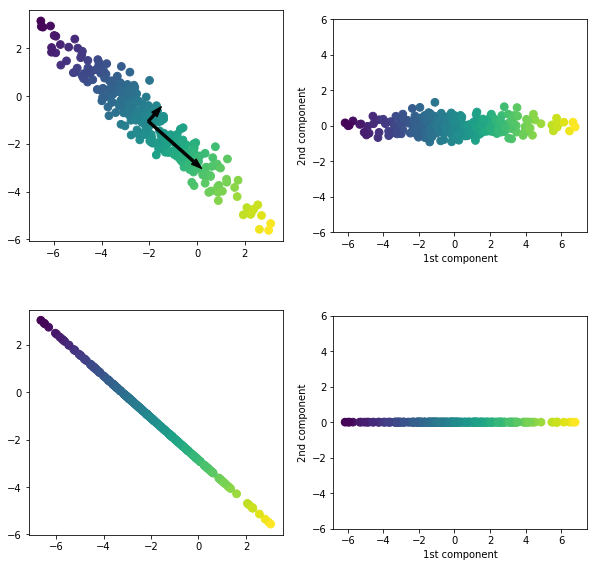

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import load_pca

X = load_pca()

pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
S = X_pca.std(axis=0)


fig, axes=plt.subplots(2, 2, figsize=(10,10))
axes = axes.ravel()



axes[0].scatter(X[:,0], X[:,1], c=X_pca[:, 0], s=60, cmap='viridis')
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
axes[0].set_aspect('equal')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=X_pca[:, 0], s=60, cmap='viridis')
axes[1].set_ylim(-6, 6)
axes[1].set_xlabel("1st component")
axes[1].set_ylabel("2nd component")
axes[1].set_aspect('equal')

axes[3].scatter(X_pca[:,0], np.zeros(len(X)), c=X_pca[:, 0], s=60, cmap='viridis')
axes[3].set_ylim(-6, 6)
axes[3].set_xlabel("1st component")
axes[3].set_ylabel("2nd component")
axes[3].set_aspect('equal')

X_inverse = pca.inverse_transform(np.c_[X_pca[:,0], np.zeros(len(X))])

axes[2].scatter(X_inverse[:,0], X_inverse[:,1], c=X_pca[:, 0], s=60, cmap='viridis')
axes[2].set_aspect('equal')

plt.show()